# DATA EXPLORATORY ANALYSIS FOR CREDIT CARD DATA

Importing Packages


In [940]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


### Importing data

In [941]:
url="C:\\Users\gouthaman\Desktop\FullStack_AI\Data Science Using Python\Project - Datascience\Python Foundation Case Study 2 - Credit Card Case Study (1)"

In [1177]:
customer = pd.read_csv(url+"\\Customer Acqusition.csv")
repayment = pd.read_csv(url+"\\Repayment.csv")
spend=pd.read_csv(url+"\\spend.csv")
CreditCard = pd.read_excel(url+"\\Credit Card Data.xlsx")


### 1. In the above dataset,
#### a. In case age is less than 18, replace it with mean of age values.

In [1178]:
customer.Age =np.where(customer.Age<18, round(customer.Age.mean()),customer.Age)

In [1179]:
#Merging Customer and Repayment

Cus_repay=pd.merge(left=customer,right=repayment,how='inner',on=['Customer'])

In [1180]:
#Merging Cuetomer and Spend 

Cus_spend=pd.merge(left=customer,right=spend,how='inner',on='Customer')

#### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [1181]:
Cus_spend.loc[Cus_spend.Amount > Cus_spend.Limit,"Amount"] = Cus_spend.Limit*0.5

#### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [1182]:
Cus_repay.loc[Cus_repay.Amount > Cus_repay.Limit,"Amount"]=Cus_repay.Limit*0.5

### 2. From the above dataset create the following summaries:


#### a. How many distinct customers exist?

In [1183]:
customer.Customer.nunique()

100

#### b. How many distinct categories exist?

In [1184]:
customer.Segment.value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_Pvt     13
Salaried_MNC     13
Name: Segment, dtype: int64

#### c. What is the average monthly spend by customers?

In [1185]:
Cus_spend.Month = pd.to_datetime(Cus_spend.Month)

In [1186]:
Cus_spend["Monthly"] = Cus_spend.Month.apply(lambda X: pd.Timestamp.strftime(X,format='%B'))
Cus_spend["Yearly"] =Cus_spend.Month.dt.year

In [1187]:
round(Cus_spend.groupby(["Monthly"])['Amount'].mean(),2)

Monthly
April        135035.93
August       165759.60
December     117272.68
February     151261.57
January      147770.18
July         166326.82
June         182037.73
March        131840.76
May          151623.98
November     150428.43
October      131017.85
September    141131.70
Name: Amount, dtype: float64

#### d. What is the average monthly repayment by customers?

In [1188]:
Cus_repay.Month = pd.to_datetime(Cus_repay.Month)
Cus_repay["Monthly"] = Cus_repay.Month.dt.strftime('%B')
Cus_repay["Yearly"] = Cus_repay.Month.dt.strftime('%Y')
Cus_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Monthly,Yearly
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75,January,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02,January,2004


In [1240]:
Cus_repay.groupby(['Monthly'])['Amount'].mean()

Monthly
April        154443.224933
August       138837.578571
December     176805.307500
February     146350.905175
January      150028.364984
July         150917.898571
June         100292.080625
March        142549.308493
May          174800.682180
November     137751.426905
October      158868.720417
September    110095.418500
Name: Amount, dtype: float64

#### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
– Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [1191]:
roi= 2.9/100
Monthly_Profit= (Cus_repay.groupby(["Monthly"])['Amount'].sum()- Cus_spend.groupby(['Monthly'])['Amount'].sum()).reset_index()

In [1192]:
Monthly_Profit= Monthly_Profit.loc[Monthly_Profit.Amount>0,["Monthly","Amount"]]

In [1193]:
Monthly_Profit["Interest"] = roi*Monthly_Profit.Amount
Monthly_Profit

,Monthly,Amount,Interest
0,April,2911094.64,84421.74456
2,December,959692.33,27831.07757
5,July,409250.68,11868.26972
7,March,763082.57,22129.39453
8,May,14655945.20,425022.41080
10,October,144349.37,4186.13173


####  f. What are the top 5 product types?


In [958]:
Cus_spend.groupby("Type")["Amount"].sum().sort_values(ascending=False)[0:6]

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
SHOPPING        17106660.97
Name: Amount, dtype: float64

#### g. Which city is having maximum spend?

In [959]:
Cus_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

City
COCHIN        45963513.50
CALCUTTA      41108132.30
BANGALORE     40461647.02
BOMBAY        28603127.38
CHENNAI       22128635.65
TRIVANDRUM    15337155.87
PATNA         15260586.97
DELHI         10918286.54
Name: Amount, dtype: float64

##### Cochin is having maximum spend

#### h. Which age group is spending more money?

### Using Cut Method

In [1203]:
cut_bins= [17,20,30,40,50,60,70,80]
label= ["below 20","21-30","31-40","41-50","51-60","61-70","71-80"]
Cus_spend['Age Cat']= pd.cut(Cus_spend.Age,bins=cut_bins,labels=label)
Cus_spend["Age Cat"].value_counts()

21-30       346
41-50       314
31-40       274
51-60       265
71-80       152
61-70       135
below 20     14
Name: Age Cat, dtype: int64

In [1204]:
df = Cus_spend.groupby("Age Cat")["Amount"].sum().reset_index()
df.sort_values(by ="Amount",ascending =False)


,Age Cat,Amount
3,41-50,57048361.87
1,21-30,52619884.21
2,31-40,37329313.58
4,51-60,29702886.19
6,71-80,27832164.63
5,61-70,15178460.75
0,below 20,70014.00


In [1205]:
##Cus_spend[(Cus_spend.Age==19)]

##### ans : 41-50 age people spend more money 

In [1202]:
### Using Qcut Method
##Cus_spend.Age.describe()
#Cus_spend['Age Cat'] =pd.qcut(Cus_spend.Age,q=4)
#Age_df = Cus_spend.groupby("Age Cat")["Amount"].sum().reset_index()
#Age_df.sort_values(by="Amount",ascending = False)

#### i. Who are the top 10 customers in terms of repayment?

In [1206]:
df = Cus_repay.groupby("Customer")['Amount'].sum().reset_index()
df.sort_values(by="Amount",ascending=False).iloc[0:10].reset_index(drop=True)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3.Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [1215]:
City_spend = Cus_spend.pivot_table(index=["Product","City",],columns="Yearly",values="Amount",aggfunc="sum")

City_spend

Yearly                     2004         2005         2006
Product  City                                            
Gold     BANGALORE   9289878.54  12892362.99  12030611.09
         BOMBAY      6987853.53   8983018.28   7917144.31
         CALCUTTA    7477140.98  10303355.80  11167532.77
         CHENNAI     1059618.50   3740945.58   2704288.62
         COCHIN      7315850.15  12110613.03  10499142.38
         DELHI       2806495.00   1964845.27   2957103.32
         PATNA       2072567.90   3252615.77   2276181.69
         TRIVANDRUM  2415102.84   1240375.85   2735710.87
Platimum BANGALORE   1112732.30    912284.97    685831.27
         BOMBAY       897264.94    711804.94    972130.01
         CALCUTTA    2037690.30   4434696.31   3589606.66
         CHENNAI     3535652.38   5053956.32   5024923.40
         COCHIN      3419904.07   4960921.71   4920592.29
         DELHI        283512.89    494157.86    176788.72
         PATNA       1113069.60   2883231.07   1256137.65
         TRIVANDRUM  2161676.67   3601443.30   2147403.75
Silver   BANGALORE   1291852.58    830612.34   1415480.94
         BOMBAY       532089.03    508988.54   1092833.80
         CALCUTTA     500006.00    440147.06   1157956.42
         CHENNAI      282056.86    377184.49    350009.50
         COCHIN       814229.62    652269.38   1269990.87
         DELHI        768172.30    612311.21    854899.97
         PATNA        756684.10    950094.19    700005.00
         TRIVANDRUM   209667.48    269912.99    555862.12

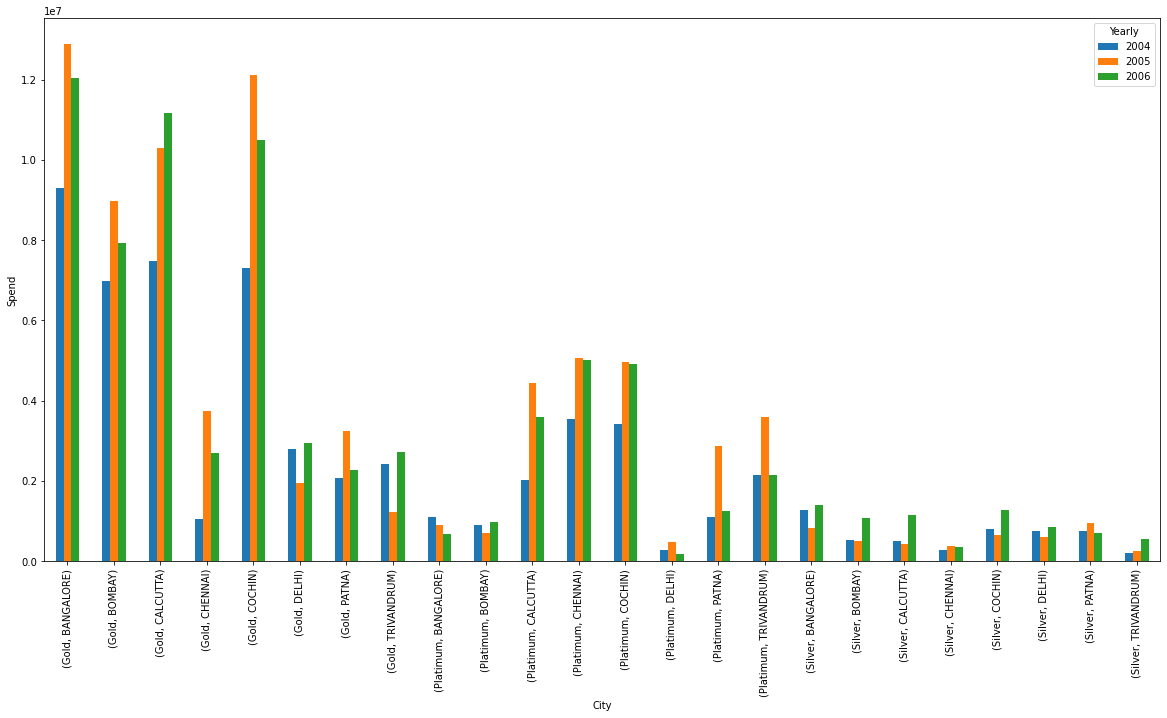

In [1216]:
City_spend.plot(kind="bar",figsize=(20,10))
plt.xlabel("City")
plt.ylabel("Spend")
plt.show()

### 4. Create graphs for
 

#### a. Monthly comparison of total spends, city wise


<Figure size 2160x2160 with 0 Axes>

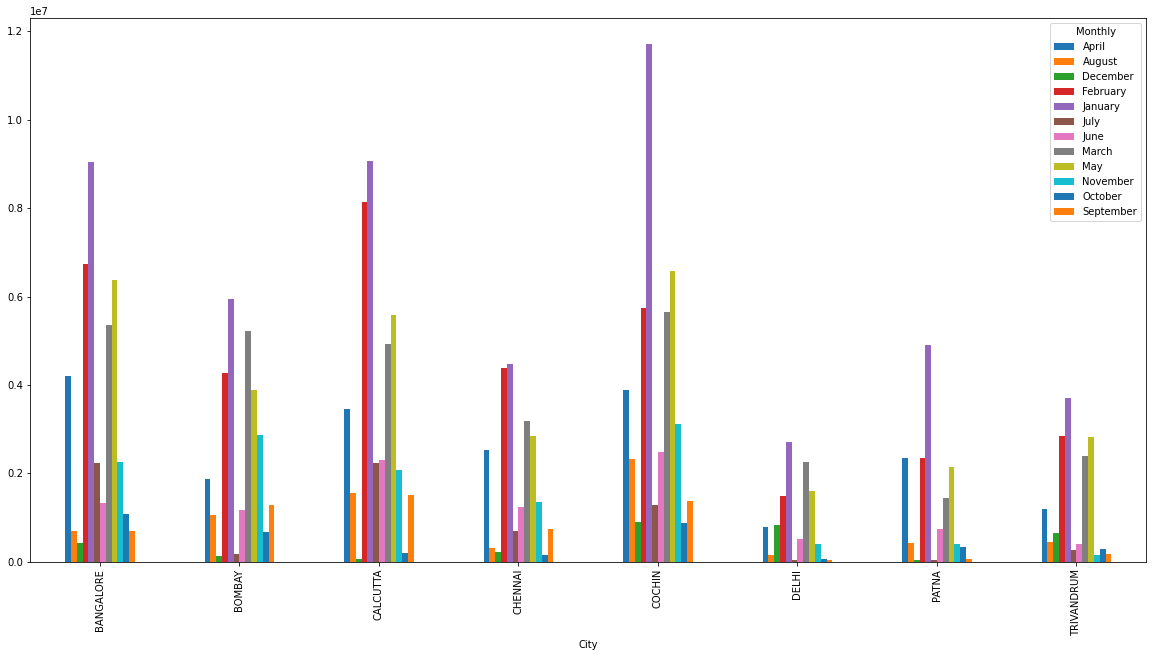

In [1217]:
plt.figure(figsize=(30,30))
Cus_spend.pivot_table(index="City",columns="Monthly",values="Amount",aggfunc="sum").plot(kind='bar',figsize=(20,10))

plt.show()

 #### b. Comparison of yearly spend on air tickets

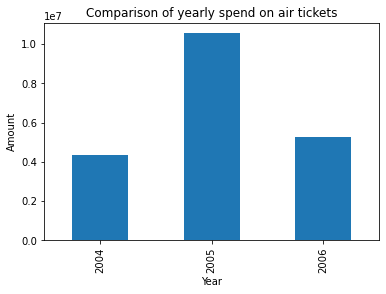

In [1218]:
Cus_spend.loc[Cus_spend.Type=='AIR TICKET'].groupby("Yearly")['Amount'].sum().plot(kind='bar')
plt.ylabel("Amount")
plt.xlabel("Year")
plt.title("Comparison of yearly spend on air tickets")
plt.show()

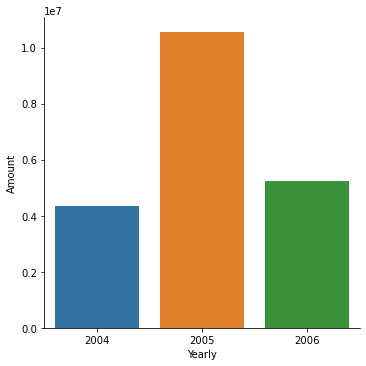

In [1219]:
#using seaborn
df=Cus_spend.loc[Cus_spend.Type=='AIR TICKET'].groupby("Yearly")['Amount'].sum()
data = df.reset_index()
sns.catplot(data=data,x="Yearly",y="Amount",kind='bar')
plt.show()

#### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)


In [1229]:
Monthly_spend=Cus_spend.pivot_table(index="Product",columns='Monthly',values="Amount",aggfunc="sum")
a=Monthly_spend.loc[:,["January","February","March","April","May","June","July","August","September","October","November","December"]]
a

Monthly,January,February,March,April,May,June,July,August,September,October,November,December
Product,,,,,,,,,,,,
Gold,32413831.83,24779179.55,19256972.48,13170572.59,21548169.76,6538862.64,5167416.37,4954030.42,3816887.62,3018223.38,9203267.46,2332940.96
Platimum,14951578.51,9134054.58,7288837.68,5182493.86,8151926.49,2965712.71,1288156.26,1714762.80,1667840.84,550275.04,2741618.42,750156.19
Silver,4206383.62,2087018.37,3909405.83,1902322.65,2140940.01,689537.61,530153.72,293109.82,442803.13,100001.50,691102.63,200537.90


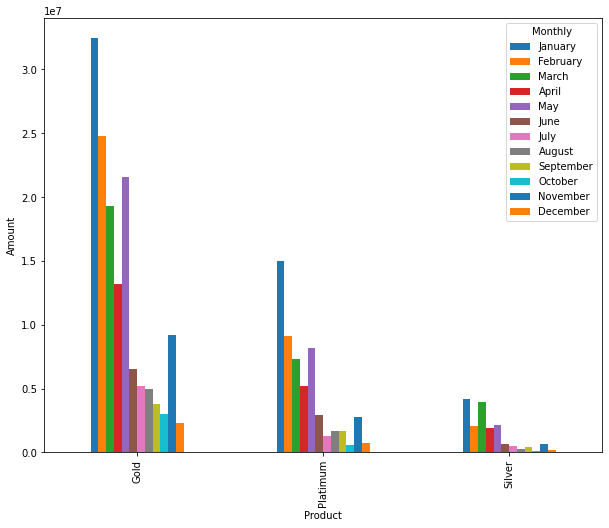

In [1232]:
a.plot(kind="bar",figsize=(10,8))
plt.ylabel("Amount")
plt.show()

##### The spend is more in January for all 3 products
1) In Gold and Platimum the spend dicreases from January till April and suddenly spikes in May

2) The spend again decreases From june till October and spikes in November(Gold and Platimum)

3) Gold and Platimum Customer spend is almost similar



### 5. Write user defined PYTHON function to perform the following analysis:

You need to find top 10 customers for each city in terms of their repayment amount by
different products and by different time periods i.e. year or month. The user should be able
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
function should automatically take these inputs while identifying the top 10 customers.

In [1235]:
Cus_repay.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Monthly,Yearly
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,495414.75,January,2004
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,245899.02,January,2004
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,259490.06,January,2004
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,437555.12,January,2004
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,165972.88,January,2005


In [1236]:
def sum_function(TimePeriod,Product,X=Cus_repay):
    Final_df= pd.DataFrame()
    
    if TimePeriod =="Yearly":
        print("Yearwise top 10 customer in each city for the Product", Product)
        
        
    if TimePeriod=="Monthly":
        print("Monthwise top 10 customer in each city for the Product", Product)
    
    df1= Cus_spend.pivot_table(index=["Product","City","Customer"],columns=TimePeriod, values="Amount",aggfunc="sum")
    
    return df1.loc[Product]
    
    
    
    

In [1239]:
sum_function("Yearly","Platimum")

Yearwise top 10 customer in each city for the Product Platimum


Yearly                     2004        2005        2006
City       Customer                                    
BANGALORE  A19         25000.00    40000.00    35000.00
           A37        720953.28   458010.71   380289.90
           A5          25005.00    30006.00    30006.00
           A52        341774.02   384268.26   240535.37
BOMBAY     A33         15003.00    15003.00    40008.00
           A36        578845.86   450009.00   555214.54
           A4          25002.50    15001.50    15001.50
           A51        278413.58   221789.94   351904.47
           A70              NaN     5000.50     5000.50
           A71              NaN     5001.00     5001.00
CALCUTTA   A20         30003.00    25002.50    45004.50
           A34        100000.00   292113.33   332968.84
           A40       1867679.80  4057569.48  3136619.32
           A49         30006.00    55011.00    70014.00
           A69              NaN     5000.00     5000.00
           A98          5000.50         NaN         NaN
           A99          5001.00         NaN         NaN
CHENNAI    A38       2989801.45  3285401.37  2827600.80
           A47         35000.00    65000.00    55000.00
           A56        510850.93  1703554.95  2142322.60
COCHIN     A21         57755.43    45009.00    67227.93
           A3          10000.00    25000.00    20000.00
           A35        291777.55   100001.00   365401.35
           A41       1219909.25  3682647.01  2171856.91
           A50        150000.00   390468.91   331167.94
           A54       1690461.84   717795.79  1959937.16
           A83              NaN         NaN     5001.00
DELHI      A53        283512.89   494157.86   176788.72
PATNA      A55       1113069.60  2883231.07  1256137.65
TRIVANDRUM A39       2126673.67  3531436.30  2092398.25
           A48         30003.00    70007.00    55005.50
           A97          5000.00         NaN         NaN